In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")

## Datos
---

Este punto debe solucionarse a partir del siguiente conjunto de datos:

In [ ]:
data = pd.read_parquet("https://drive.google.com/uc?export=view&id=1VGFo8Ds6PmXegNtifdpk8-7_dNOb7Mur")
x, y = data.x.values, data.y.values

In [ ]:
x = np.reshape(x, (1000 , 1))

In [ ]:
y = np.reshape(y, (1000 , 1))

Text(0, 0.5, '$y$')

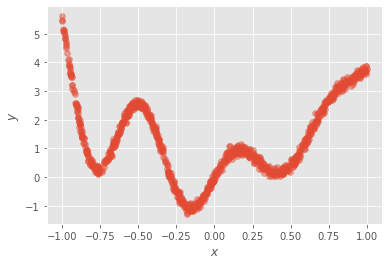

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x, y, alpha=0.5)
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")

In [ ]:
X = np.concatenate([x, np.ones_like(x)], axis=1)

## Parte 1
---

Implemente un modelo de regresión lineal sobre los datos usando `numpy` (sin usar `sklearn`):

In [ ]:
# Su código aquí
w = np.linalg.inv(X.T @ X) @ X.T @ y

In [ ]:
x_test = np.linspace(-1, 1, 10).reshape(-1, 1)
X_test = np.concatenate([x_test, np.ones_like(x_test)], axis=1)

In [ ]:
y_pred = X_test @ w

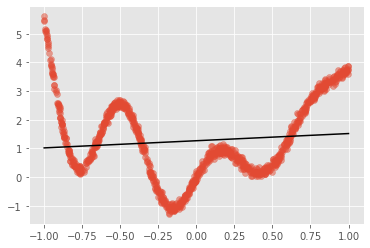

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x, y, alpha=0.5)
ax.plot(x_test, y_pred, color="k")

## Parte 2
---

Utilizando el vector `x_test`, genere un vector de predicciones `y_pred`:

In [ ]:
def f(x):
    return np.ones_like(x_test)

In [ ]:
x_test = np.linspace(-1, 1, 100)
# Su código aquí
y_pred = f(x)

Utilice la siguiente celda para revisar el resultado:

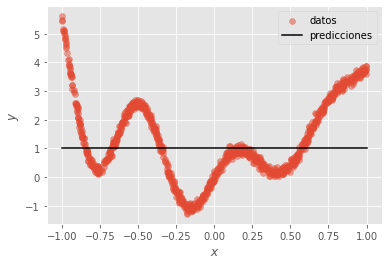

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x, y, alpha=0.5, label="datos")
ax.plot(x_test, y_pred, label="predicciones", color='k')
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.legend()

## Parte 3
---

Según lo observado, el modelo de regresión lineal es apropiado para los datos?

**Discuta los resultados**

Aunque ambos modelos sean similares, y puedan er tomados para realizar predicciones de los datos, el mejor modelo es el generado por numpy( esto solo si toca elegir alguno de los dos modelos lineales generados). Como se puede observar, los datos no se presentan en forma lineal, tiene otro tipo de comportamiento, por lo cual un modelo de regresion lineal no es el mas apropiado para realizar predicciones de este conjunto de datos

## Parte 4
---

Genere una matriz de características a partir de los datos `x`. Por ejemplo:

$$
\mathbf{x_i} = [x ^ 0, x ^ 1, x ^ 2, x ^ 3]
$$

Puede usar cualquier función aritmética/geométrica para transformar los datos, lo importante es que resulte como una matriz de $(N, m)$ (muestras por características).

In [ ]:
def transform(x):
    # X = np.vander(x, 4)
    X = np.vander(np.arange(5), 3)
    X = np.vander(x.flatten(), 19)
    # Su código aquí
    return X

## Parte 5
---

Entrene un modelo de regresión lineal con los datos transformados, seleccione unas transformaciones que den la mejor aproximación a los datos.

In [ ]:
X = transform(x)
# Su código aquí
w = np.linalg.inv(X.T @ X) @ X.T @ y

## Parte 6
---

Genere predicciones a partir del vector `x_test`:

In [ ]:
# Su código aquí
X_test = np.vander(x_test.flatten(), 19)

In [ ]:
y_pred = X_test @ w

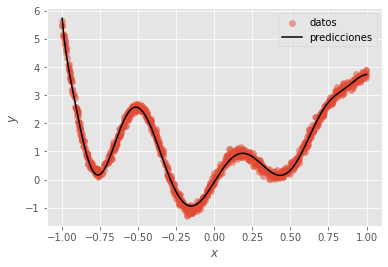

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x, y, alpha=0.5, label="datos")
ax.plot(x_test, y_pred, label="predicciones", color='k')
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.legend()

## Parte 7
---

Revise el modelo [Ridge Regression](https://en.wikipedia.org/wiki/Ridge_regression#:~:text=Ridge%20regression%20is%20a%20method,econometrics%2C%20chemistry%2C%20and%20engineering.):

Encuentre la solución analítica de ridge regression usando álgebra lineal (muestre y explique el paso a paso de la deducción).

MInimos cuadrados:

$\hat{\beta}=(X^TX+\lambda I)^{-1}X^Ty$

Minimos cuadrados sin regularizacion

$\hat{\beta}=(X^TX)^{-1}X^Ty$
Reemplazar: $X=USV^T$

$\hat{\beta}=(X^TX+\lambda I)^{-1}X^Ty$

$\hat{\beta}=((USV^T)^TUSV^T+\lambda I)^{-1}(USV^T)^Ty$

$\hat{\beta}=(VS^TU^TUSV^T+\lambda I)^{-1}VS^TU^Ty$

$\hat{\beta}=(VS^2V^T+\lambda I)^{-1}VSU^Ty$

$VS^2V^T$  -> $VS^2V^T = V(S^TS)V^T = VD_1V^T$

Reemplazar: $\hat{\beta}=(VS^2V^T+\lambda I)^{-1}VSU^Ty$

$\hat{\beta}=(VD_1V^T+\lambda I)^{-1}VSU^Ty$

$V^T=V^{-1}$   ->  $\hat{\beta}=(VD_1V^T+\lambda VV^{-1})^{-1}VSU^Ty$

$\hat{\beta}=(VD_1V^T+\lambda VV^{-1}V)V^{-1}SU^Ty$

$\hat{\beta}=(D_1+\lambda I)^{-1}V^{-1}SU^Ty$

$\hat{\beta}=V(D_1+\lambda I)^{-1}U^Ty$

Esta es la solución analítica de Ridge Regression. Para implementarla en un programa, se pueden seguir estos pasos:

Calcular la matriz $X^TX$ y el vector $X^Ty$.
Calcular la descomposición en valores singulares de la matriz $X$ usando una biblioteca como NumPy.
Calcular la matriz diagonal $D_1$ y la matriz ortogonal $V$ a partir de la descomposición en valores singulares.
Calcular la matriz ortogonal $U$ a partir de la descomposición en valores singulares.
Calcular la solución analítica de Ridge Regression utilizando la fórmula $\hat{\beta}=V(D_1+\lambda I)^{-1}U^Ty$.
La regularización de Ridge Regression es útil para prevenir el sobreajuste y mejorar la generalización del modelo. El hiperparámetro $\lambda$ controla la fuerza de la regularización, y su valor óptimo se puede encontrar mediante validación cruzada.

## Parte 8
---

Implemente la solución analítica de Ridge Regression:

In [ ]:
X = transform(x)
k = 0.01 # hiperparámetro de regularización de ridge regression
# Su código aquí
w = np.linalg.inv(X.T @ X + k * np.identity(X.shape[1])) @ X.T @ y

## Parte 9
---

Genere predicciones a partir del vector `x_test`:

In [ ]:
x_test = np.linspace(-1, 1, 1000)
#X_test = np.concatenate([x_test, np.ones_like(x_test)], axis=1)
#x_test = np.linspace(-1, 1, 100)
X_test = transform(x_test)
# Su código aquí
y_pred = X_test @ w

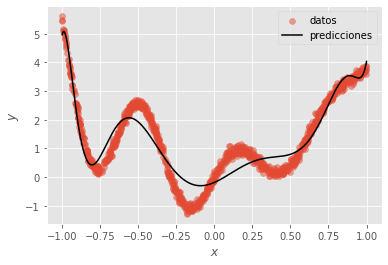

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x, y, alpha=0.5, label="datos")
ax.plot(x_test, y_pred, label="predicciones", color='k')
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.legend()

## Parte 10
---

Cambie el hiperparámetro de regularización `k` de ridge regression. Responda las siguientes preguntas:

* Qué efecto tiene ese hiperparámetro sobre las predicciones?

  * **RTA:** Puede reducir la complejidad del modelo, es decir, simplifica la relacion entre las variables de entrada y las variables prediccion, que junto a la varianza y sesgo del modelo pueden hacer que las predicciones sean mejores o peores. Osea, disminuye el sobreajuste.*
* Qué efecto tiene ese hiperparámetro sobre los parámetros del modelo $w$?

  * **RTA:** Agrega penalizacion a los parametros del modelo, lo que hace que los coeficientes posean valores mas pequeños.*
* Por qué se usa este hiperparámetro?

  * **RTA:** Controla el grado de regularizacion del modelo, si encuentra el valor adecuado permite que exista un equilibrio entre los datos del modelo y los datos generados.*

* Qué es regularización en los modelos de machine learning?

  * **RTA:** Es una tecnica que evita el sobreajuste de los datos de un modelo, lo cual mejora la capacidad de generar predicciones.*

## **Cuando aumenta K**

In [ ]:
X = transform(x)
k = 100 # hiperparámetro de regularización de ridge regression
# Su código aquí
w = np.linalg.inv(X.T @ X + k * np.identity(X.shape[1])) @ X.T @ y

In [ ]:
x_test = np.linspace(-1, 1, 1000)
#X_test = np.concatenate([x_test, np.ones_like(x_test)], axis=1)
#x_test = np.linspace(-1, 1, 100)
X_test = transform(x_test)
# Su código aquí
y_pred = X_test @ w

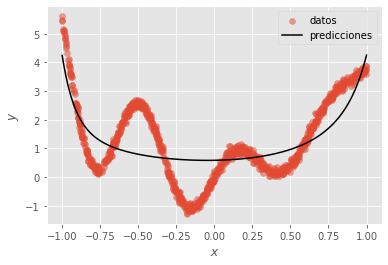

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x, y, alpha=0.5, label="datos")
ax.plot(x_test, y_pred, label="predicciones", color='k')
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.legend()

## **Cuando disminuye K**

In [ ]:
X = transform(x)
k = 0.00001 # hiperparámetro de regularización de ridge regression
# Su código aquí
w = np.linalg.inv(X.T @ X + k * np.identity(X.shape[1])) @ X.T @ y

In [ ]:
x_test = np.linspace(-1, 1, 1000)
#X_test = np.concatenate([x_test, np.ones_like(x_test)], axis=1)
#x_test = np.linspace(-1, 1, 100)
X_test = transform(x_test)
# Su código aquí
y_pred = X_test @ w

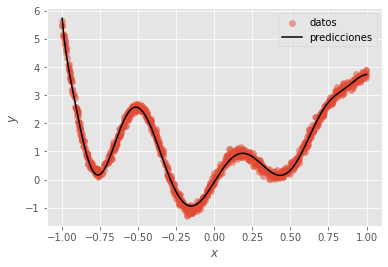

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x, y, alpha=0.5, label="datos")
ax.plot(x_test, y_pred, label="predicciones", color='k')
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.legend()

# **Conclusiones**

Si aumenta el valor de k, la linea de predicciones asumira un valor similar a lo que sucede con la regresion lineal, es decir, se ajusta "equitativamente" a la mayor cantidad de datos. Mientras si disminuye, Los datos generados de predicciòn seran mas precisos, osea, se ajustan mejor al modelo, por loq eu puede que realice predicciones mas exactas.